In this project we want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [71]:
#reading the datasets
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

#exploring dete_survey
dete_survey.info()
dete_survey.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [72]:
print(dete_survey.isnull().sum())

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

From above we can see that `dete_survey` contains 822 rows and 56 columns. Some of the columns contain 0 null values, while others (especially the last few) have a null value in almost every row. However, we can also see that rows contain `'Not Stated'`, which means that values are missing, but aren't represented as `NaN`, meaning that `isnull()` doesn't count them. Let's explore `tafe_survey` next.

In [73]:
#exploring tafe_survey
tafe_survey.info()
tafe_survey.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

`tafe_survey` contains 72 columns and 702 rows. There are some columns that contain over 100 null values, and some that contain 0. We can't see all the null data from this print above because we didn't bypass print limitation, but this is all we need to get started with out data cleaning process. This information also tells us that we don't need all the columns to answer our questions. We can also see that both dataframes contain many columns that contain same information, but are named differently.

## Fixing null values And Removing Columns

Let's start cleaning our data by changing all the `Not Stated` values to `NaN`.

In [75]:
#changing Not Stated to NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

Now we can start to delete columns that don't provide us useful information. As a reminder, we want to answer questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

To answer these questions, we can safely delete columns 28 to 49 from `dete_survey` and columns 17 to 66 from `tefe_survey`.

In [76]:
#deleting columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

print(dete_survey_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

## Cleaning Column Names

From the `dete_survey`'s column list above we want to use the following columns for our final analysis: `ID`, `SeparationType`, `Cease Date`, `DETE Start Date`, `Age` and `Gender`. The columns are named differently in `tafe_survey`, so we need to identify the correct columns and name them correctly. Let's start by renaming `dete_survey_updated` column names.

In [77]:
#making all the capitalization lowercase, removing whitespace, replacing spaces with _
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")
#printing first few rows to check that changes work as intended
print(dete_survey_updated.head(2))

   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   

   role_start_date        position classification          region  \
0           2004.0  Public Servant        A01-A04  Central Office   
1              NaN  Public Servant        AO5-AO7  Central Office   

                       business_unit    employment_status  ...  \
0  Corporate Strategy and Peformance  Permanent Full-time  ...   
1  Corporate Strategy and Peformance  Permanent Full-time  ...   

   work_life_balance  workload  none_of_the_above  gender    age  aboriginal  \
0              False     False               True    Male  56-60         NaN   
1              False     False              False    Male  56-60         NaN   

   torres_strait  south_sea  disability  nesb  
0            NaN        NaN         NaN   Yes  
1            NaN        NaN         NaN   

All the `dete_survey_updated` columns are now lowercase. Next we are going to update column names for `tafe_survey_updated` so that they match `dete_survey_updated`.

In [78]:
new_names = {'Record ID': 'id', 
             'CESSATION YEAR': 'cease_date', 
             'Reason for ceasing employment': 'separationtype', 
             'Gender. What is your Gender?': 'gender', 
             "CurrentAge. Current Age": 'Age', 
             'Employment Type. Employment Type': 'employment_status', 
             'Classification. Classification': 'position', 
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
             'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns=new_names)
print(tafe_survey_updated.head(2))

             id                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   

                   WorkArea  cease_date    separationtype  \
0  Non-Delivery (corporate)      2010.0  Contract Expired   
1  Non-Delivery (corporate)      2010.0        Retirement   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                 

## Filtering the Data

Next we are going to remove the data we don't need. Since we are only interested about those who were resigning due to some kind of dissatisfaction, we are only going to include `'Resignation'` values from `separationtype`. However, if we take a closer look at `separationtype`, we can see that there are multiple different reasons for resignation. 

In [79]:
print(dete_survey_updated['separationtype'])

0                     Ill Health Retirement
1          Voluntary Early Retirement (VER)
2          Voluntary Early Retirement (VER)
3                 Resignation-Other reasons
4                            Age Retirement
                       ...                 
817                          Age Retirement
818                          Age Retirement
819    Resignation-Move overseas/interstate
820                   Ill Health Retirement
821    Resignation-Move overseas/interstate
Name: separationtype, Length: 822, dtype: object


We can't see most of the rows again, but from this we can already tell that the data contains different resignation values, like `Resignation-Other reasons`, and `Resignation-Move overseas/interstate`. To calculate all the unique values for `separationtype` column, we can use the following code.

In [80]:
print(dete_survey_updated['separationtype'].value_counts())
print("\n")
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


Now we want to get only those rows, that have `Resignation` in them. To do this, we are going to copy all those rows to new dataframe.

In [81]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']
                                   .str.startswith("Resignation")]
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation']

Now if we print the value counts for `separationtype`columns again, we can see that only resignations are left.

In [82]:
print(dete_resignations['separationtype'].value_counts())
print("\n")
print(tafe_resignations['separationtype'].value_counts())

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64


Resignation    340
Name: separationtype, dtype: int64


## Verifying the Data

Next we are going to verify our data by checking the years in the `cease_date` and `dete_start_date` columns. We are going to check that these dates aren't in the future, and that they aren't too early either (we are going to use the year 1940 as the earliest possible starting year).

In [83]:
print(dete_resignations['cease_date'].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64


From above we can see that some of the dates contain months, while others only contain years. Next we are going to replace those rows that contain months, with years only, and convert them from string to int.

In [84]:
#making copy of datasets to avoid pandas copywarning
dete_resignations = dete_resignations.copy()

#replacing dates with years only (years are always last 4 letters in this dataset)
dete_resignations['cease_date'] = dete_resignations['cease_date'].str[-4:].astype('float')
print(dete_resignations['cease_date'].value_counts())

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


Now there are only years in `cease_date` column. Let's check the values for `dete_start_date` and `tafe_resignations` column `cease_date`.

In [85]:
print(dete_resignations['dete_start_date'].value_counts().sort_index())

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64


We can see that the earliest starting year is 1963, which sounds reasonable. 

In [86]:
print(tafe_resignations['cease_date'].value_counts())

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64


`tafe_resignations` values are also correct. Now we know that there aren't any majos issues with the years in the dataset.

## Creating New Column

To answer our question about the reasons of employees resigning after a short period of time or after being at the job longer, we need to create a new column that shows the length of time an employee spent in a workplace. `tafe_resignations` already has a column `institute service`, so we have to great one for `dete_resignations` also. We can do this by subtracting `dete_start_date` from `cease_date`.

In [87]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

## Identifying Dissatisfied Employees

Next, we will identify employees who resigned because they were dissatisfied. To do that we will use the following reasonings for resignation:
1. tafe_survey_updated:
    - `Contributing Factors. Dissatisfaction`
    - `Contributing Factors. Job Dissatisfaction`
2. dete_survey_updated:
    - `job_dissatisfaction`
    - `dissatisfaction_with_the_department`
    - `physical_work_encironment`
    - `lack_of_recognition`
    - `lack_of_job_security`
    - `work_location`
    - `employment_conditions`
    - `work_life_balance`
    - `workload`
    
If any of these reasons have caused employee to resign, we will mark them as `dissatisfied` in a new column. We will begin with `tafe_resignations`.

In [88]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


We can see that there are two types of values for both columns. We are going to change `-` to `False` and the value presenting dissatisfaction to `True`.

In [89]:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
    
#Making a copy to avoid copy warning
tafe_resignations_up = tafe_resignations.copy()
    
# Creating the 'dissatisfied' column 
dissatisfied_column = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)

tafe_resignations_up['dissatisfied'] = dissatisfied_column

tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

Above we created `dissatisfied` column for `tafe_resignations` to see that there are 241 `True` values, 91 `False` values and 8 `NaN` values. Next we are going to make a new `dissatisfied` column for `dete_resignations` that also contains values `True` and `False`. If any of the columns mentioned earlier contains `True`, dissatisfied column will also get the value `True`.

In [90]:
#creating column separately again to avoid copy warning
dissatisfied_column_dete = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department',
                                             'physical_work_environment', 'lack_of_recognition',
                                             'lack_of_job_security', 'work_location', 'employment_conditions',
                                             'work_life_balance', 'workload']].any(1, skipna=False)
dete_resignations.loc[:, 'dissatisfied'] = dissatisfied_column_dete
dete_resignations_up = dete_resignations.copy()

dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

`dete_resignations` didn't have any null values, it has 162 `False` values and 149 `True` values. Now that we have cleared our data, we are ready to combine them.

## Combining the Data

First we are going to add a new column `institue`, so we can easily see from the institute that the data is from. Each row will contain either value `DETE` or `TAFE`. Then we will combine the dataframes, and drop rest of the columns that we don't need for our analysis. 

In [91]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

#combining dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

#deleting columns that have less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis = 1)

print(combined_updated.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   institute_service  563 non-null    object 
 7   dissatisfied       643 non-null    object 
 8   institute          651 non-null    object 
dtypes: float64(2), object(7)
memory usage: 50.9+ KB
None


Now we have only 9 columns left. Next we are going to clean the `institute_service` column.

## Cleaning the Service Column

Let's take a closer look at the `institute_service` column:

In [92]:
print(combined_updated['institute_service'].value_counts(dropna=False))

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


As we can see from above, there are a lot of different unique values. To clean this data, we are going to use the following categories:
- New: 0-3 years
- Experienced: 3-6 years
- Established: 7-10 years
- Veteran 11+ years

In [93]:
#getting rid of copy warning
combined_up = combined_updated.copy()
# Extract the years of service and convert the type to float
combined_up['institute_service_up'] = combined_up['institute_service'].astype('str').str.extract(r'(\d+)')
combined_up['institute_service_up'] = combined_up['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_up['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

Now the year values are correct and easier to use, so we can change them to the categories provided earlier.

In [94]:
def year_to_category(x):
    if x < 3:
        return "New"
    elif x > 3 and x <= 6:
        return "Experienced"
    elif x > 6 and x <= 10:
        return "Established"
    elif x > 11:
        return "Veteran"
    elif pd.isnull(x):
        return np.nan
    
#changing the years to categories in the column
combined_up['institute_service_up'] = combined_up['institute_service_up'].apply(year_to_category)
print(combined_up['institute_service_up'].value_counts())

New            193
Veteran        106
Experienced     89
Established     62
Name: institute_service_up, dtype: int64


Now we have all the required information to perform our initial analysis.

## Performing Initial Analysis

In [95]:
#True and False values in dissatisfied column
print(combined_up['dissatisfied'].value_counts(dropna=False))

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64


We can see that there are 8 `Nan` values in the `dissatisfied` column. We are going to deal with them by replacing their values with `False`, since it occurs the most in our dataset.


In [96]:
combined_up['dissatisfied'] = combined_up['dissatisfied'].fillna(False)
print(combined_up['dissatisfied'].value_counts(dropna=False))

False    411
True     240
Name: dissatisfied, dtype: int64


Next, we are going to turn this into a pivot table to calculate the percentage of dissatisfied employees in each of the service categories.

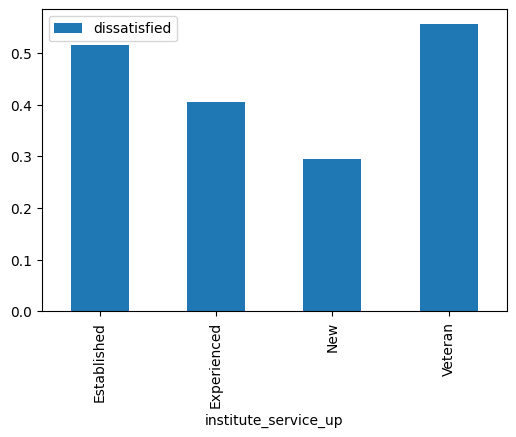

In [97]:
%matplotlib inline

dissatisfied_percentage = combined_up.pivot_table(index='institute_service_up', values='dissatisfied', aggfunc = 'mean')
dissatisfied_percentage.plot(kind='bar')

## Conclusion

From the plot above we can see that those who have worked for a short pedior of time have resigned due to dissatisfaction, but those that have worked longer period of times are more often resigning due to dissatisfaction. Especially those that have worked for over 7 years (Established and Veteran) are resigning due to dissatisfaction.